In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from datetime import timedelta
plt.style.use('seaborn')
%matplotlib inline
sns.set(style = 'white')

# Portfolio 1: Analysis of Cycling Data

## Loading Data

The first dataset is an export of my ride data from [Strava](https://strava.com/), an online social 
network site for cycling and other sports.  This data is a log of every ride since the start of 2018
and contains summary data like the distance and average speed.  It was exported using 
the script `stravaget.py` which uses the stravalib module to read data. Some details of
the fields exported by that script can be seen in [the documentation for stravalib](https://pythonhosted.org/stravalib/api.html#stravalib.model.Activity). 

The exported data is a CSV file so that's easy to read, however the date information in the file is 
recorded in a different timezone (UTC) so we need to do a bit of conversion.  In reading the data I'm
setting the index of the data frame to be the datetime of the ride. 

In [2]:
strava = pd.read_csv('data/strava_export.csv', index_col='date', parse_dates=True)
# strava.index = strava.index.tz_convert('UTC')
strava.head()

,average_heartrate,average_temp,average_watts,device_watts,distance,elapsed_time,elevation_gain,kudos,moving_time,workout_type
date,,,,,,,,,,
2018-01-02 20:47:51+00:00,100.6,21.0,73.8,False,15.2,94,316.00 m,10,73,Ride
2018-01-04 01:36:53+00:00,NaN,24.0,131.7,False,18.0,52,236.00 m,5,46,Ride
2018-01-04 02:56:00+00:00,83.1,25.0,13.8,False,0.0,3,0.00 m,2,2,Ride
2018-01-04 05:37:04+00:00,110.1,24.0,113.6,False,22.9,77,246.00 m,8,64,Ride
2018-01-05 19:22:46+00:00,110.9,20.0,147.7,True,58.4,189,676.00 m,12,144,Ride


The second dataset comes from an application called [GoldenCheetah](https://www.goldencheetah.org/) which provides
some analytics services over ride data.  This has some of the same fields but adds a lot of analysis of the 
power, speed and heart rate data in each ride.  This data overlaps with the Strava data but doesn't include all 
of the same rides. 

Again we create an index using the datetime for each ride, this time combining two columns in the data (date and time) 
and localising to Sydney so that the times match those for the Strava data. 

In [3]:
cheetah = pd.read_csv('data/cheetah.csv', skipinitialspace=True)
cheetah.index = pd.to_datetime(cheetah['date'] + ' ' + cheetah['time'])
cheetah.index = cheetah.index.tz_localize('Australia/Sydney')
cheetah.head()

,date,time,filename,axPower,aPower Relative Intensity,aBikeScore,Skiba aVI,aPower Response Index,aIsoPower,aIF,...,Rest AVNN,Rest SDNN,Rest rMSSD,Rest PNN50,Rest LF,Rest HF,HRV Recovery Points,NP,IF,TSS
2018-01-28 06:39:49+11:00,01/28/18,06:39:49,2018_01_28_06_39_49.json,202.211,0.75452,16.6520,1.31920,1.67755,223.621,0.83441,...,0,0,0,0,0,0,0,222.856,0.83155,20.2257
2018-01-28 07:01:32+11:00,01/28/18,07:01:32,2018_01_28_07_01_32.json,226.039,0.84343,80.2669,1.21137,1.54250,246.185,0.91860,...,0,0,0,0,0,0,0,245.365,0.91554,94.5787
2018-02-01 08:13:34+11:00,02/01/18,08:13:34,2018_02_01_08_13_34.json,0.000,0.00000,0.0000,0.00000,0.00000,0.000,0.00000,...,0,0,0,0,0,0,0,0.000,0.00000,0.0000
2018-02-06 08:06:42+11:00,02/06/18,08:06:42,2018_02_06_08_06_42.json,221.672,0.82714,78.8866,1.35775,1.86002,254.409,0.94929,...,0,0,0,0,0,0,0,253.702,0.94665,98.3269
2018-02-07 17:59:05+11:00,02/07/18,17:59:05,2018_02_07_17_59_05.json,218.211,0.81422,159.4590,1.47188,1.74658,233.780,0.87231,...,0,0,0,0,0,0,0,232.644,0.86808,171.0780


The GoldenCheetah data contains many many variables (columns) and I won't go into all of them here. Some
that are of particular interest for the analysis below are:

Here are definitions of some of the more important fields in the data. Capitalised fields come from the GoldenCheetah data
while lowercase_fields come from Strava. There are many cases where fields are duplicated and in this case the values
should be the same, although there is room for variation as the algorithm used to calculate them could be different
in each case. 

  * Duration - overall duration of the ride, should be same as elapsed_time
  * Time Moving - time spent moving (not resting or waiting at lights), should be the same as moving_time
  * Elevation Gain - metres climbed over the ride
  * Average Speed - over the ride
  * Average Power - average power in watts as measured by a power meter, relates to how much effort is being put in to the ride, should be the same as  * average_watts' from Strava
  * Nonzero Average Power - same as Average Power but excludes times when power is zero from the average
  * Average Heart Rate - should be the same as average_heartrate
  * Average Cadence - cadence is the rotations per minute of the pedals
  * Average Temp - temperature in the environment as measured by the bike computer (should be same as average_temp)
  * VAM - average ascent speed - speed up hills
  * Calories (HR) - Calorie expendature as estimated from heart rate data
  * 1 sec Peak Power - this and other  'Peak Power' measures give the maximum power output in the ride over this time period.  Will be higher for shorter periods. High values in short periods would come from a very 'punchy' ride with sprints for example.
  * 1 min Peak Hr - a similar measure relating to Heart Rate
  * NP - Normalised Power, a smoothed average power measurement, generally higher than Average Power 
  * TSS - Training Stress Score, a measure of how hard a ride this was
  * device_watts - True if the power (watts) measures were from a power meter, False if they were estimated
  * distance - distance travelled in Km
  * kudos - likes from other Strava users (social network)
  * workout_type - one of  'Race',  'Workout' or  'Ride'
  
  
Some of the GoldenCheetah parameters are defined [in their documentation](https://github.com/GoldenCheetah/GoldenCheetah/wiki/UG_Glossary).  

## Your Tasks

Your first task is to combine these two data frames using the [`join` method of Pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html#joining-on-index).   The goal is to keep only those rows of data 
that appear in __both__ data frames so that we have complete data for every row.  

## Merging Strava and Cheetah Datasets
We merge the **strava** data with the **cheetah** data using their indices to match observations from one dataset to the other. We specify an inner join to capture the observations that are common in both datasets.

In [4]:
cycling = strava.join(cheetah, how = "inner")
print('The dimensions of the Cycling Data is: {}'.format(cycling.shape))

The dimensions of the Cycling Data is: (243, 372)


The resulting dataset, which we named the **cycling** data, has 243 observations (rows) and 372 variables (columns).

## Cycling Dataset Exploratory Analysis
We remove the cycling rides that have no recorded power reading as these are considered as commutes and MTB rides.

In [5]:
cycling_complete = cycling[cycling["device_watts"] == True]
print('The dimensions of Cycling Data after removing commutes and MTB rides is: {}'.format(cycling_complete.shape))

The dimensions of Cycling Data after removing commutes and MTB rides is: (205, 372)


There are 38 rides with such condition and when omitted from our **cycling** dataset, we are left with 209 observations. We named this the **cycling_complete** dataset.

### Converting Variables as Factors and Creating New Variables
The *workout_type* variable is currently coded as character and we proceed with converting it into categorical data to be used in our succeeding analysis. The elevation gain data is encoded with it's unit of measurement (meters). We extract the numeric part of *elevation_gain* and drop the unit of measurement.

In [6]:
cycling_complete['workout_type'] = cycling_complete.workout_type.astype('category')
cycling_complete['elevation_gain'] = cycling_complete.elevation_gain.str.replace('[^\d\.\d]', '').astype('float')

/Users/jvlpz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/jvlpz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Since our dataset contains 372 variables and we are interested on only a handful of them, we define an object that contains our variables of interest. Let's display the first 5 observations of the data frame with the relevant variables only.

In [7]:
factors = ["distance", "moving_time", "Average Speed", "average_heartrate", "average_watts", "NP", "TSS", "elevation_gain", "workout_type"]
cycling_complete[factors].head()

,distance,moving_time,Average Speed,average_heartrate,average_watts,NP,TSS,elevation_gain,workout_type
2018-01-27 19:39:49+00:00,7.6,17,26.0234,120.6,153.4,222.856,20.2257,95.0,Ride
2018-01-27 20:01:32+00:00,38.6,67,34.4380,146.9,187.7,245.365,94.5787,449.0,Race
2018-02-05 21:06:42+00:00,24.3,65,22.2417,119.3,165.9,253.702,98.3269,439.0,Ride
2018-02-07 06:59:05+00:00,47.1,134,20.7841,124.8,151.0,232.644,171.0780,890.0,Ride
2018-02-09 19:18:03+00:00,59.8,139,25.6585,123.0,145.9,212.726,147.7970,656.0,Ride


### Summary Statistics

In [8]:
cycling_complete[factors].describe()

,distance,moving_time,Average Speed,average_heartrate,average_watts,NP,TSS,elevation_gain
count,205.000000,205.000000,205.000000,185.000000,205.000000,205.000000,205.000000,205.000000
mean,35.519512,83.170732,25.707538,123.667568,167.632195,223.127137,100.537880,359.576585
std,21.290148,51.330868,4.734588,13.024952,32.632763,30.130636,69.170757,320.012227
min,0.000000,10.000000,4.737600,73.300000,103.700000,139.591000,7.239700,0.000000
25%,19.800000,46.000000,23.079100,116.900000,143.000000,205.448000,44.127400,52.000000
50%,32.100000,64.000000,25.107200,122.300000,163.700000,223.192000,82.356800,312.000000
75%,58.100000,135.000000,26.711200,129.900000,189.600000,241.060000,159.363000,595.000000
max,108.200000,236.000000,38.350200,156.500000,266.600000,302.396000,412.071000,1474.000000


The average distance travelled when cycling is 35.52 kilometers, with half of the rides having more than 32.10 kilometers covered. The farthest cycling distance was 108.20 kilometers. On average, the cycling speed is 25.71 km/hr and 50% of the rides have over 25.11 km/hr cycling speed with the fastest being 38.35 km/hr. The average heart rate per ride is 123.66 bpm with the highest being 156.5 bpm. Note that there are 20 rides in our dataset that does not have average heart rate reading. The average power per ride is 167.63 watts, average normalised power is 223.12 watts and the average training stress score is 100.54. The highest elevation climbed on a ride is 1,474 meters and the average elevation climbed per ride is 359.58 meters.

### Visualising the Distributions of Key Variables
We now look at the distribution of key variables in our dataset: distance, moving time, average speed, average power and training stress score. The observations on the distribution of the variables are discussed after the last histogram plot.

Skewness of the distribution of distance:  0.5132584678230234


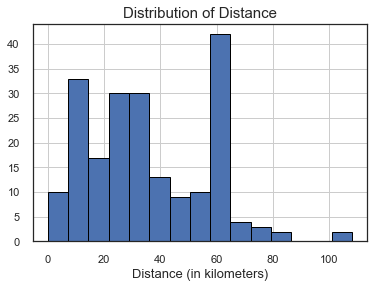

In [9]:
plt_dist = cycling_complete.distance.hist(density = 0, bins = 15, edgecolor = 'black')
plt_dist.set_title('Distribution of Distance', size = 15)
plt_dist.set_xlabel('Distance (in kilometers)', size = 13)
print("Skewness of the distribution of distance: ", cycling_complete.distance.skew())

Skewness of the distribution of time:  0.5636319808541944


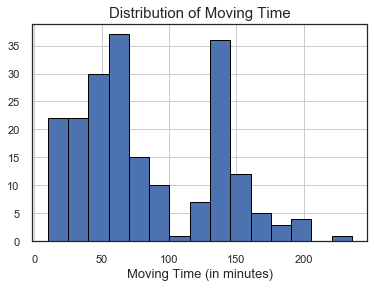

In [10]:
plt_time = cycling_complete.moving_time.hist(density = 0, bins = 15, edgecolor = 'black')
plt_time.set_title('Distribution of Moving Time', size = 15)
plt_time.set_xlabel('Moving Time (in minutes)', size = 13)
print("Skewness of the distribution of time: ", cycling_complete.moving_time.skew())

Skewness of the distribution of average speed:  0.43621318841282203


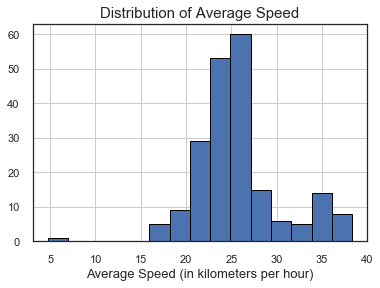

In [11]:
plt_speed = cycling_complete['Average Speed'].hist(density = 0, bins = 15, edgecolor = 'black')
plt_speed.set_title('Distribution of Average Speed', size = 15)
plt_speed.set_xlabel('Average Speed (in kilometers per hour)', size = 13)
print("Skewness of the distribution of average speed: ", cycling_complete['Average Speed'].skew())

Skewness of the distribution of average power:  0.5401996157445961


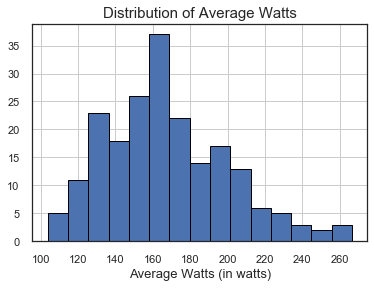

In [12]:
plt_watts = cycling_complete.average_watts.hist(density = 0, bins = 15, edgecolor = 'black')
plt_watts.set_title('Distribution of Average Watts', size = 15)
plt_watts.set_xlabel('Average Watts (in watts)', size = 13)
print("Skewness of the distribution of average power: ", cycling_complete.average_watts.skew())

Skewness of the distribution of training stress score:  1.0832346587856845


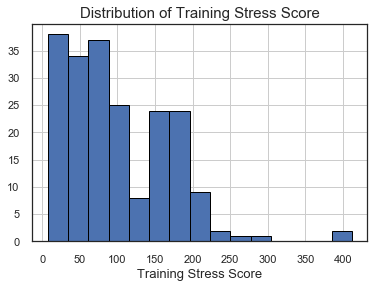

In [13]:
plt_tss = cycling_complete.TSS.hist(density = 0, bins = 15, edgecolor = 'black')
plt_tss.set_title('Distribution of Training Stress Score', size = 15)
plt_tss.set_xlabel('Training Stress Score', size = 13)
print("Skewness of the distribution of training stress score: ", cycling_complete.TSS.skew())

By looking at the histograms, the variables don't seem to follow the normal distribution. We also compute for the skewness of each distribution and conclude that all of them are positively skewed.

### Correlations Between the Variables of Interest
Let's define a function that displays the Pearson's correlation coefficient for each variable pair in our dataset.

In [14]:
def corrdot(*args, **kwargs):
    corr_r = args[0].corr(args[1], 'pearson')
    corr_text = f"{corr_r:2.2f}".replace("0.", ".")
    ax = plt.gca()
    ax.set_axis_off()
    marker_size = abs(corr_r) * 10000
    ax.scatter([.5], [.5], marker_size, [corr_r], alpha = 0.6, cmap = "coolwarm",
               vmin = -1, vmax = 1, transform = ax.transAxes)
    font_size = abs(corr_r) * 40 + 5
    ax.annotate(corr_text, [.5, .5,],  xycoords = "axes fraction",
                ha = 'center', va = 'center', fontsize = font_size)

/Users/jvlpz/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/jvlpz/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


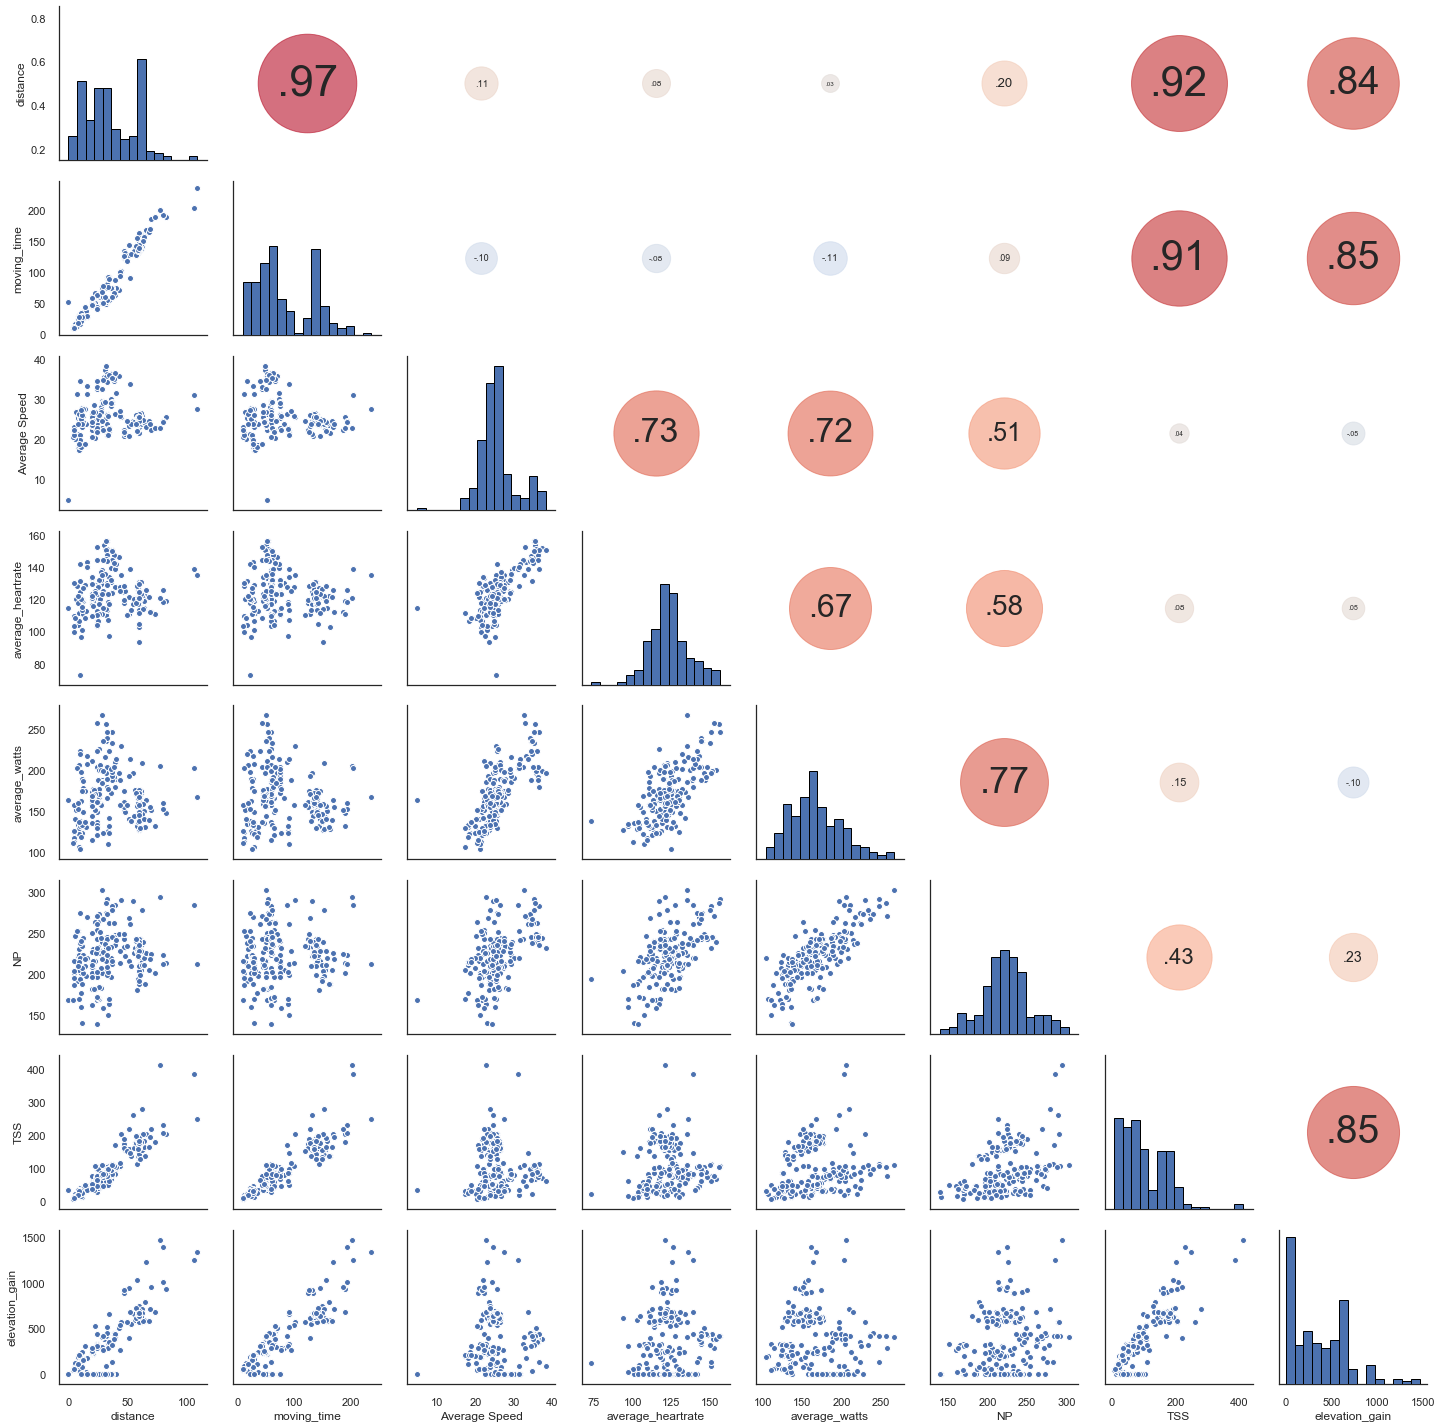

In [15]:
corr_plot = sns.PairGrid(cycling_complete[factors])
corr_plot.map_diag(plt.hist, bins = 15, edgecolor = "black")
corr_plot.map_lower(plt.scatter, edgecolor = "white")
corr_plot.map_upper(corrdot)

Significant relationships can be observed among our variables of interest. The size of the circle represents the strength of the relationship between the variables, the figure inside is the Pearson correlation coefficient, with values ranging from -1 (perfectly negative correlation) to 1 (perfectly positive correlation), and the stronger the shade of red, the more significant the relationship is:
* All significant relationships are positively correlated.
* Distance and moving time are very highly correlated, as should be expected since it takes more time to cover longer distances.
* A very strong correlation can also be observed between distance and training stress score. This might be due to rides becoming tougher and more difficult the longer the distance cycled. Similar relationship can be observed with moving time and training stress score.
* Training stress score and elevation gain are highly correlated as it takes more effort and energy to climb higher elevations.
* Elevation gain are highly positively associated with distance and moving time. These associations might be due to the following: (1) climbing higher elevations take longer time since cycling uphill takes a lot effort, and (2) climbing steeper slopes to get to a certain elevation might require detours which cover a longer distance.
* High positive correlation is observed between average speed, average heart rate, average power and normalised power. Faster cycling speed require more effort which can increase the heart rate.

### Exploring the Workout Types

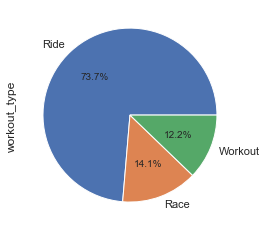

In [16]:
cycling_complete.workout_type.value_counts().plot.pie(autopct='%1.1f%%')

The cycling dataset is composed of 73.7% rides, and 14.1% races and 12.2% workouts. We'll look at a subset of variables and highlight the differences between each workout type.

We'll define a function that will serve as a template for our boxplot to compare each workout type.

In [17]:
def mod_boxplot(x, y, ax0, ax1, xlabel):
    ax = sns.boxplot(x = x, y = y, data = cycling_complete, ax = axs[ax0, ax1])
    ax.set_xlabel(xlabel, size = 25)
    ax.set_xticklabels(ax.get_xmajorticklabels(), size = 25)
    ax.set_ylabel('')
    ax.set_yticklabels(ax.get_ymajorticklabels(), size = 25)
    return ax

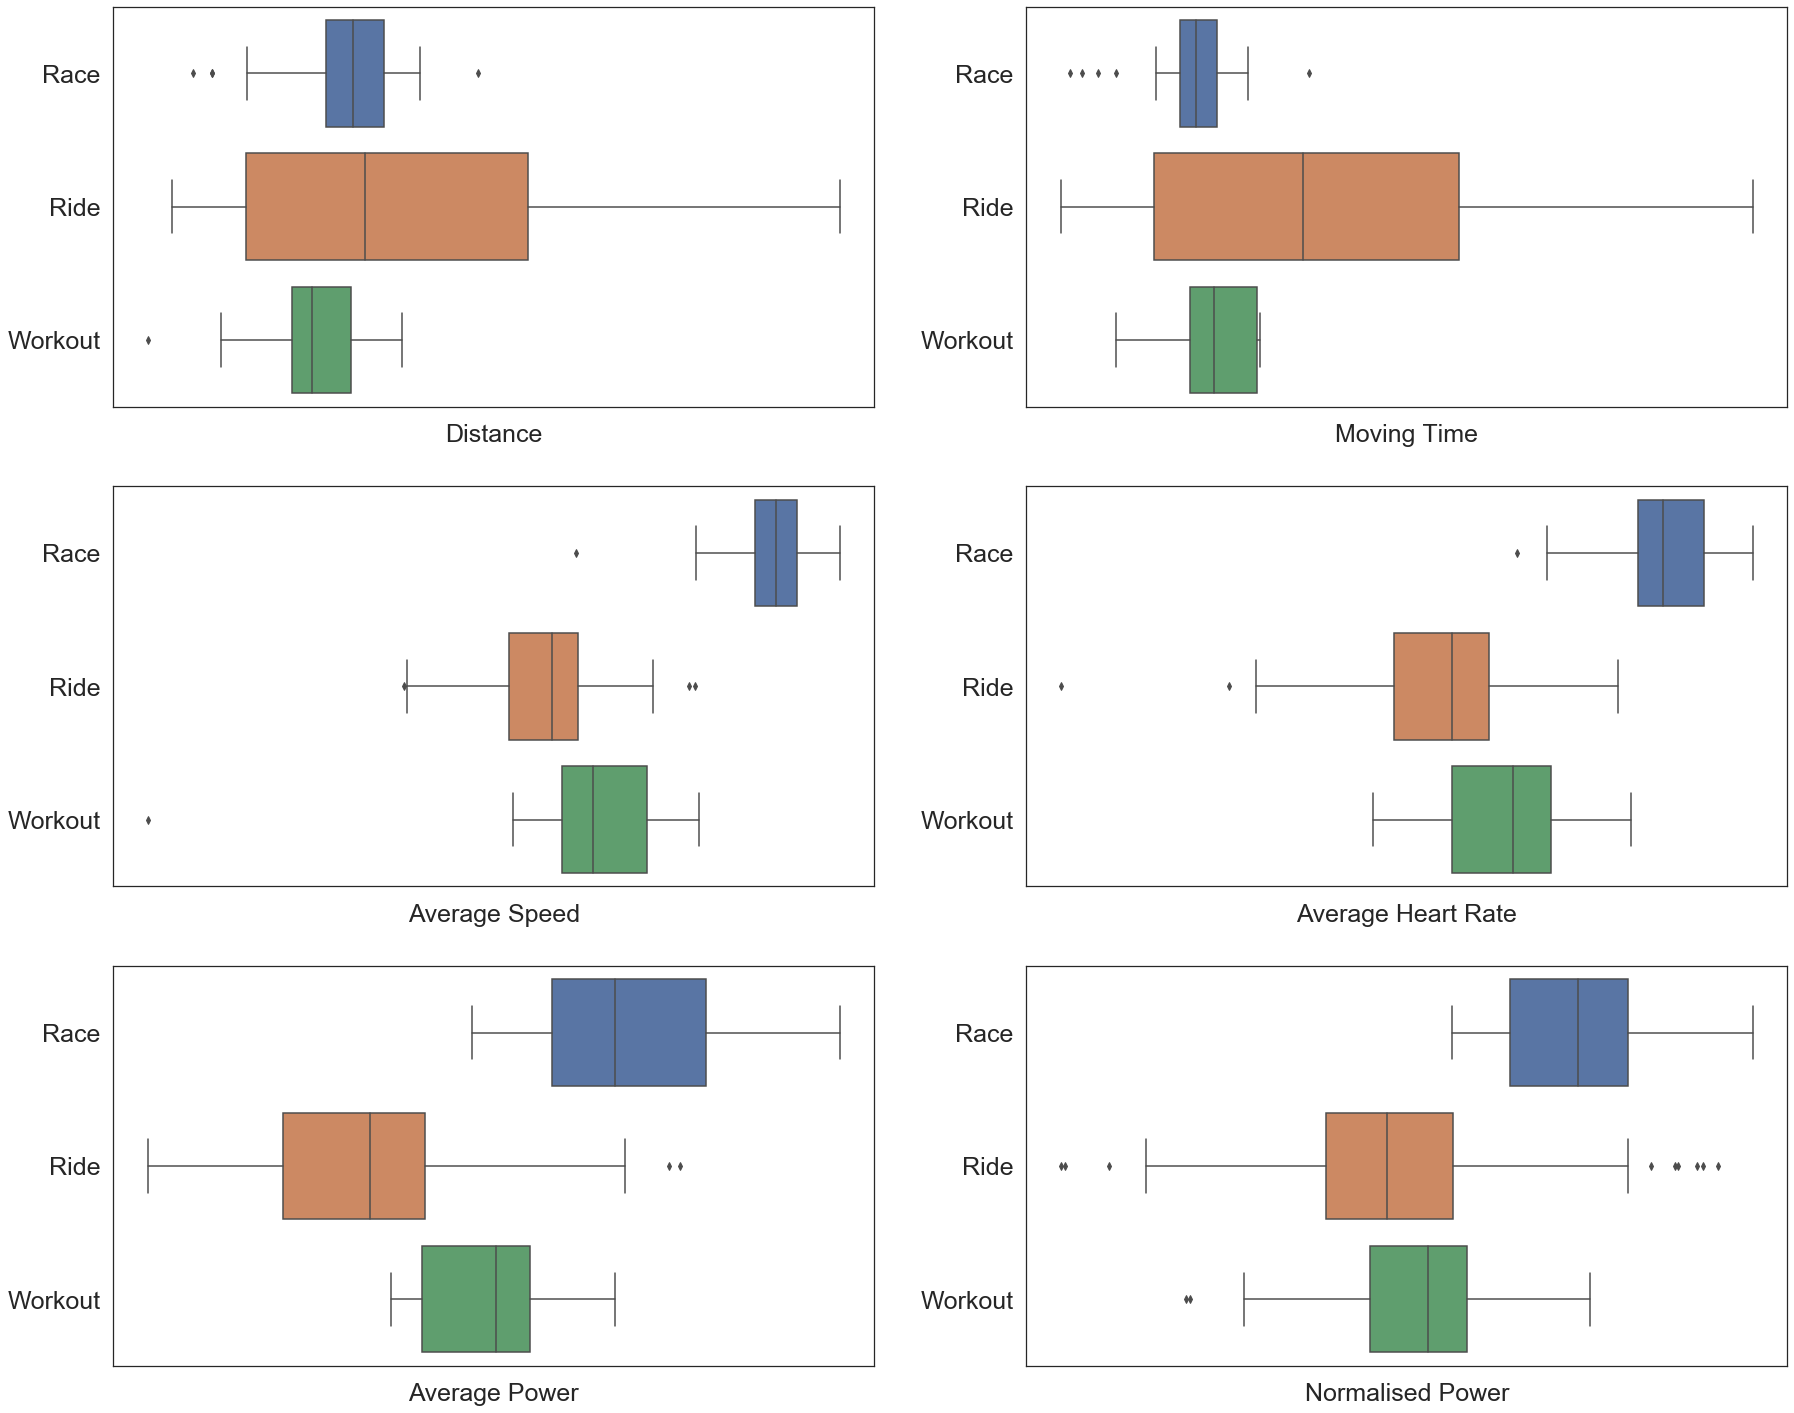

In [18]:
fig, axs = plt.subplots(ncols = 2, nrows = 3, figsize=(30,25))

mod_boxplot('distance', 'workout_type', 0, 0, 'Distance')
mod_boxplot('moving_time', 'workout_type', 0, 1, 'Moving Time')
mod_boxplot('Average Speed', 'workout_type', 1, 0, 'Average Speed')
mod_boxplot('average_heartrate', 'workout_type', 1, 1, 'Average Heart Rate')
mod_boxplot('average_watts', 'workout_type', 2, 0, 'Average Power')
mod_boxplot('NP', 'workout_type', 2, 1, 'Normalised Power')

The median distance covered during rides and races are not that different but the spread/range of values is wider for rides due to more datapoints. The median distance covered for workouts are less than both distance covered on race and rides.

Races are finished in a shorter time as compared to rides even if they have identical median distance covered. Workouts are finished in a shorter time compared to rides. Again, the spread/range of values for rides is wider compared to the other two types of workout and it is due to more datapoints available for rides.

The average speed, average heart rate, average power and normalised power are higher for races as compared to rides and workouts. Rides have the lower average speed, average heart rate, average power and normalised power among the three workout types.

/Users/jvlpz/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/jvlpz/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


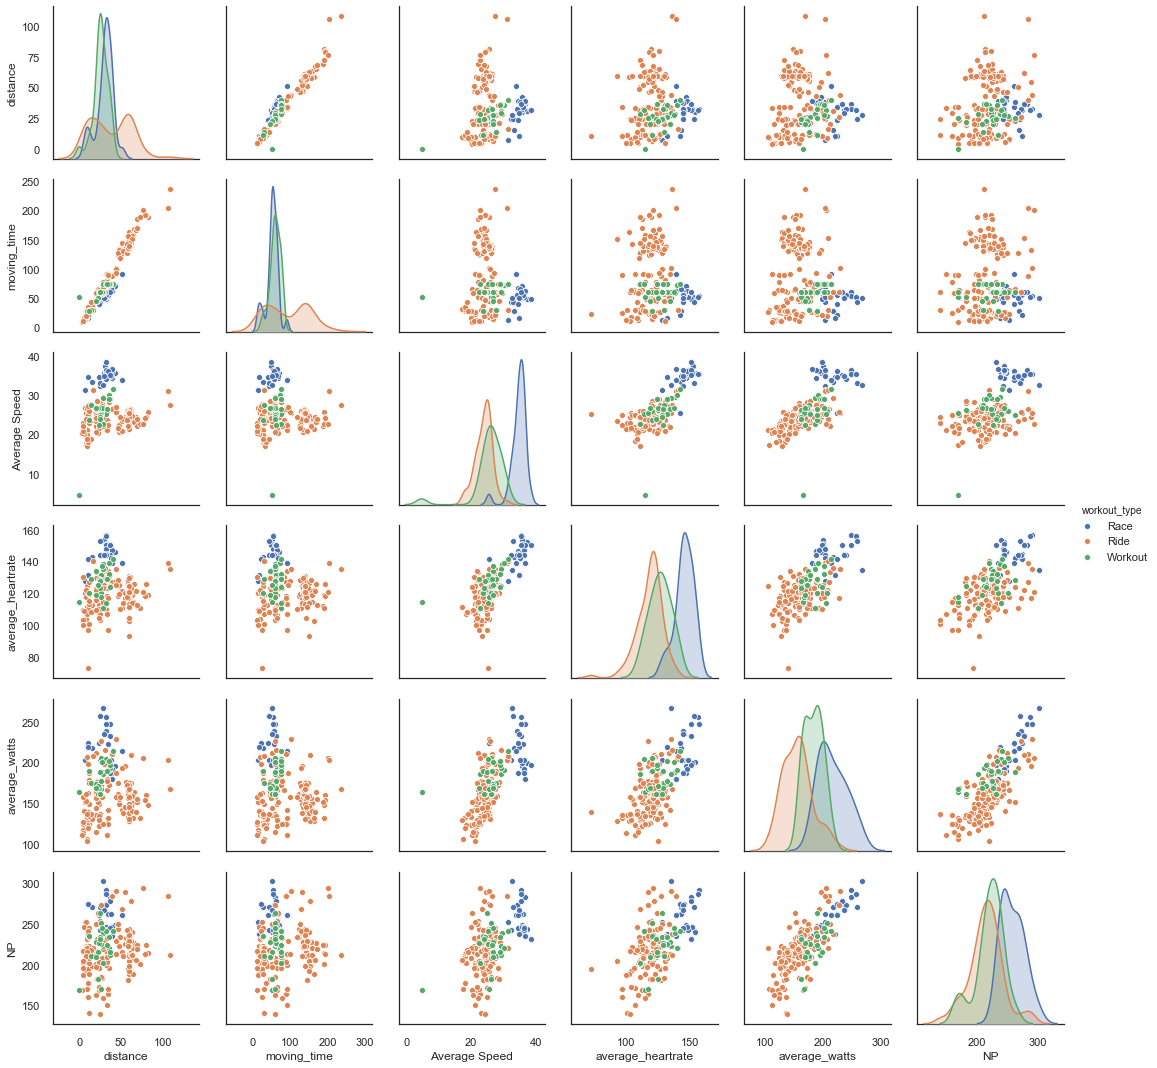

In [19]:
corr_plot_workout = sns.pairplot(cycling_complete[['distance', 'moving_time', 'Average Speed', 'average_heartrate', 'average_watts', 'NP', 'workout_type']], hue = "workout_type")

The scatterplot matrix confirms the observations made above.

## Summary Statistics and Distribution of Kudos

In [20]:
cycling_complete.kudos.describe()

count    205.000000
mean      11.531707
std        5.508035
min        2.000000
25%        7.000000
50%       11.000000
75%       16.000000
max       24.000000
Name: kudos, dtype: float64

On average, a ride receives 11.53 kudos. The highest number of kudos that a ride got is 24 and the lowest is 2. The kudos distribution does not follow a normal distribution, its skewness is 0.22 which means the distribution is moderately symmetic.

Skewness of the distribution of kudos:  0.22282575097149607


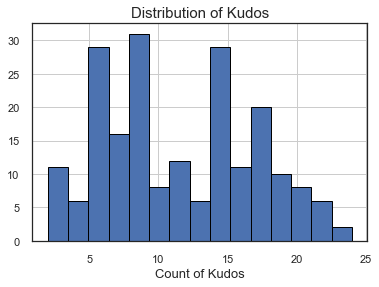

In [21]:
plt_kudos = cycling_complete.kudos.hist(density = 0, bins = 15, edgecolor = 'black')
plt_kudos.set_title('Distribution of Kudos', size = 15)
plt_kudos.set_xlabel('Count of Kudos', size = 13)
print("Skewness of the distribution of kudos: ", cycling_complete.kudos.skew())

The kudos variable doesn't seem to follow the normal distribution. We calculate the skewness and conclude that the distribution of kudos is positively skewed.

## What Gets More Kudos?

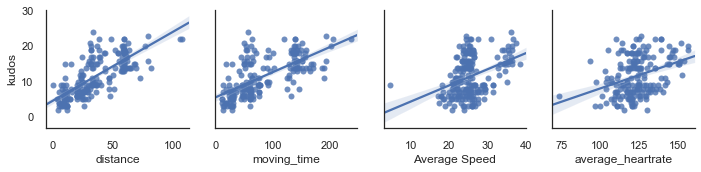

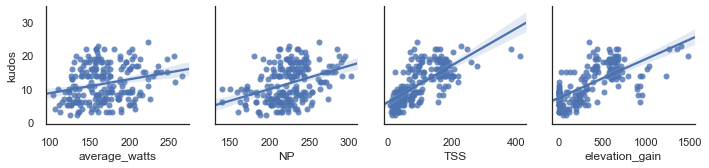

In [22]:
sns.pairplot(data = cycling_complete, y_vars = ['kudos'], x_vars = factors[0:4], kind = 'reg')
sns.pairplot(data = cycling_complete, y_vars = ['kudos'], x_vars = factors[4:8], kind = 'reg')

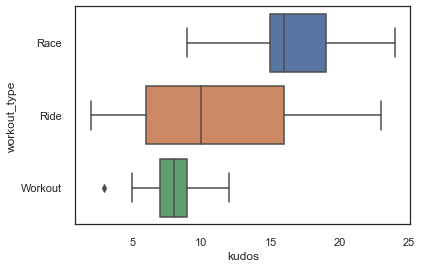

In [23]:
sns.boxplot(x = 'kudos', y = 'workout_type', data = cycling_complete)

Generally, kudos is positively correlated with the key variables as displayed in the scatterplots above. Races get higher kudos as compared to rides and workouts. Workouts have the lowest median kudos out of the three workout types.

## Plot of Distance, Stress and Speed per Month

We first get a subset of the cycling data containing all the variables of interest. We compute for the start of the month to be used as the index of our plot, extract the month-year information from it and convert them into string data. Then, we perform aggregation on the month-year variable and calculate the total distance, total stress and average of average speed. We then create plots for all the aggregation and label the plot as necessary.

In [24]:
plot_cycling = cycling_complete[['distance', 'TSS', 'Average Speed']]
plot_cycling['month'] = (plot_cycling.index - pd.offsets.MonthBegin(1)).date
plot_cycling.head()

/Users/jvlpz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,distance,TSS,Average Speed,month
2018-01-27 19:39:49+00:00,7.6,20.2257,26.0234,2018-01-01
2018-01-27 20:01:32+00:00,38.6,94.5787,34.4380,2018-01-01
2018-02-05 21:06:42+00:00,24.3,98.3269,22.2417,2018-02-01
2018-02-07 06:59:05+00:00,47.1,171.0780,20.7841,2018-02-01
2018-02-09 19:18:03+00:00,59.8,147.7970,25.6585,2018-02-01


In [25]:
table1 = plot_cycling.groupby('month').sum()[['distance', 'TSS']]
table2 = plot_cycling.groupby('month').mean()['Average Speed']
monthly_plot = table1.join(table2, how = "inner")
monthly_plot = monthly_plot.reset_index()
monthly_plot.columns = ['month', 'total_distance', 'total_stress', 'average_speed']
monthly_plot = monthly_plot.sort_values('month')
monthly_plot['month_year'] = monthly_plot.month.apply(lambda x: x.strftime('%B %Y'))
monthly_plot.head()

,month,total_distance,total_stress,average_speed,month_year
0,2018-01-01,46.2,114.8044,30.230700,January 2018
1,2018-02-01,423.4,1282.4769,23.429608,February 2018
2,2018-03-01,487.3,1390.8382,26.157382,March 2018
3,2018-04-01,368.4,1119.6003,22.733291,April 2018
4,2018-05-01,333.0,889.4034,24.564975,May 2018


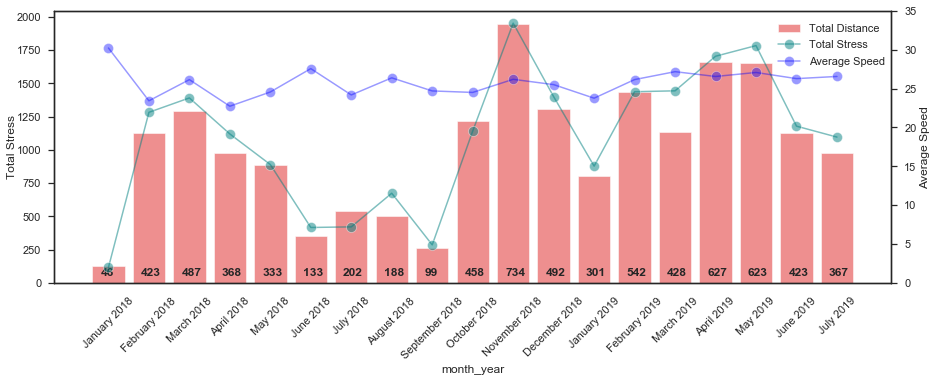

In [26]:
fig, ax = plt.subplots(figsize = (15, 5))
distance_plot = sns.barplot('month_year', 'total_distance', data = monthly_plot, color = 'red',
                            ax = ax, alpha = 0.5, label = 'Total Distance')
distance_plot.set(yticks = [], ylabel = 'Total Stress')
distance_plot.set_xticklabels(distance_plot.get_xticklabels(), rotation = 45)
distance_plot.yaxis.labelpad = 37

for i, v in enumerate(monthly_plot.total_distance):
    distance_plot.text(i - 0.2,
                       v / monthly_plot.total_distance[i] + 20,
                       '%i' % monthly_plot.total_distance[i],
                       fontsize = 12,
                       fontweight = 'bold')

ax2 = ax.twinx()
stress_plot = sns.lineplot('month_year', 'total_stress', data = monthly_plot, color = 'teal',
                           ax = ax2, marker = 'o', markersize = 10, alpha = 0.5, label = 'Total Stress', sort = False)
stress_plot.set(ylabel = '', ylim = (0, None))

ax3 = ax2.twinx()
speed_plot = sns.lineplot('month_year', 'average_speed', data = monthly_plot, color = 'blue', ax = ax3,
                          marker = 'o', markersize = 10, alpha = 0.4, label = 'Average Speed', sort = False)
speed_plot.set(ylabel = 'Average Speed', ylim = (0, 35))

ax.legend(loc = (.86, .9), frameon = False)
ax2.legend( loc = (.86, .84), frameon = False)
ax3.legend( loc = (.86, .78), frameon = False)

Total distance and stress seem to move similarly with each other month to month. The average speed, on the other hand, don't seem to be proportional with either distance and stress.

## Plot of Distance, Stress and Speed per Date of a Given Month

A similar approach is done for the plot by date. This time, we create a function that takes in a month as a parameter and displays the plot for that month in the two years that span our dataset.

In [27]:
plot_cycling['date'] = plot_cycling.index.date
plot_cycling.head()

/Users/jvlpz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,distance,TSS,Average Speed,month,date
2018-01-27 19:39:49+00:00,7.6,20.2257,26.0234,2018-01-01,2018-01-27
2018-01-27 20:01:32+00:00,38.6,94.5787,34.4380,2018-01-01,2018-01-27
2018-02-05 21:06:42+00:00,24.3,98.3269,22.2417,2018-02-01,2018-02-05
2018-02-07 06:59:05+00:00,47.1,171.0780,20.7841,2018-02-01,2018-02-07
2018-02-09 19:18:03+00:00,59.8,147.7970,25.6585,2018-02-01,2018-02-09


In [28]:
table1 = plot_cycling.groupby('date').sum()[['distance', 'TSS']]
table2 = plot_cycling.groupby('date').mean()['Average Speed']
daily_plot = table1.join(table2, how = "inner")
daily_plot = daily_plot.reset_index()
daily_plot['month'] = daily_plot.date.apply(lambda x: x.strftime('%B'))
daily_plot.columns = ['date', 'total_distance', 'total_stress', 'average_speed', 'month']
daily_plot.date = daily_plot.date.apply(lambda x: x.strftime('%Y-%m-%d'))
daily_plot.head()

,date,total_distance,total_stress,average_speed,month
0,2018-01-27,46.2,114.8044,30.2307,January
1,2018-02-05,24.3,98.3269,22.2417,February
2,2018-02-07,47.1,171.0780,20.7841,February
3,2018-02-09,59.8,147.7970,25.6585,February
4,2018-02-10,38.8,85.0492,31.3581,February


In [29]:
def monthly_cycling(m):
    month_subset = daily_plot[daily_plot.month == m].reset_index()

    fig, ax = plt.subplots(figsize = (15, 5))
    distance_d_plot = sns.barplot('date', 'total_distance', data = month_subset, color = 'red',
                                ax = ax, alpha = 0.5, label = 'Total Distance')
    distance_d_plot.set(yticks = [], ylabel = 'Total Stress')
    distance_d_plot.set_xticklabels(distance_d_plot.get_xticklabels(), rotation = 45)
    distance_d_plot.yaxis.labelpad = 32
    
    for i, v in enumerate(month_subset.total_distance):
        distance_d_plot.text(i,
                             v / month_subset.total_distance[i],
                             '%i' % month_subset.total_distance[i],
                             fontsize = 12,
                             fontweight = 'bold')

    ax2 = ax.twinx()
    stress_d_plot = sns.lineplot('date', 'total_stress', data = month_subset, color = 'teal',
                                 ax = ax2, marker = 'o', markersize = 10, alpha = 0.5, label = 'Total Stress')
    stress_d_plot.set(ylabel = '', ylim = (0, None))

    ax3 = ax2.twinx()
    speed_d_plot = sns.lineplot('date', 'average_speed', data = month_subset, color = 'blue', ax = ax3,
                              marker = 'o', markersize = 10, alpha = 0.5, label = 'Average Speed')
    speed_d_plot.set(ylabel = 'Average Speed', ylim = (0, None))

    ax.legend(loc = (1.03, .9), frameon = False)
    ax2.legend( loc = (1.03, .84), frameon = False)
    ax3.legend( loc = (1.03, .78), frameon = False)
    
    return ax, ax2, ax3

(<matplotlib.axes._subplots.AxesSubplot at 0x1a2a5372b0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a2360bf28>)

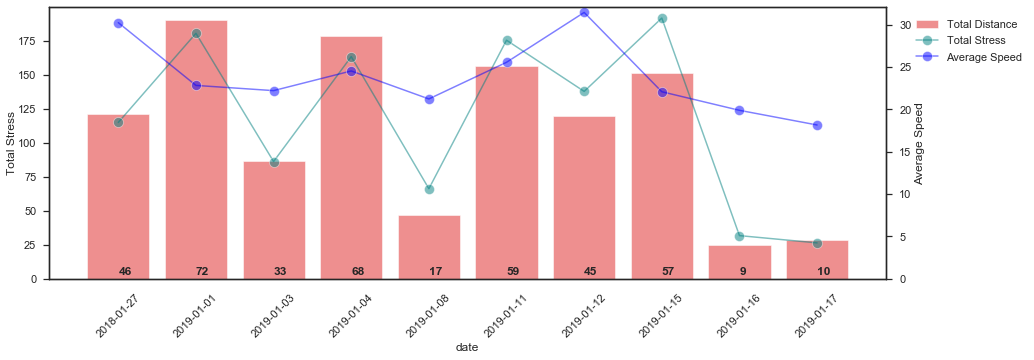

In [30]:
monthly_cycling('January')

(<matplotlib.axes._subplots.AxesSubplot at 0x1a231dea20>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a237cd160>)

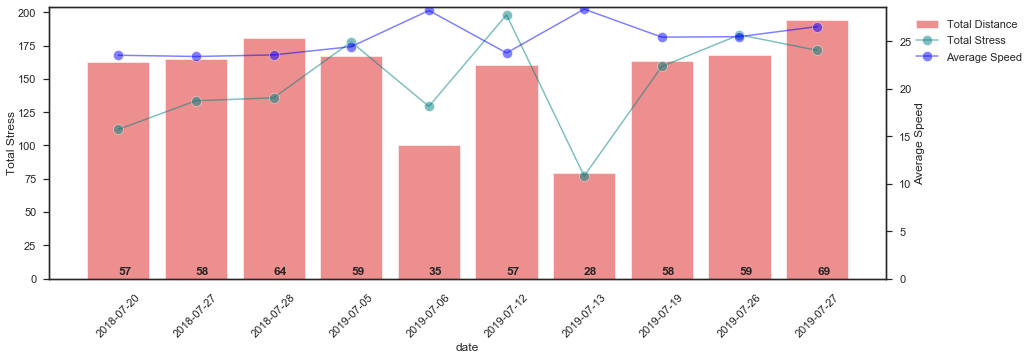

In [31]:
monthly_cycling('July')